<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.datasets import imdb
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [17]:
max([max(sequence) for sequence in test_data])

9999

In [18]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

1646592/1641221 [==============================] - 1s 1us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [0]:
import numpy as np  #匯入 numpy 模組, 後續程式以 np 使用

def vectorize_sequences(sequences, dimension=10000):  #sequences 將傳入 train_data
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #用 enumerate 取元素值
        results[i, sequence] = 1.   #將 result[i] 特定索引值的數值設定為 1
    return results
    
x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

In [0]:
y_train = np.asarray(train_labels).astype('float32')  #向量化訓練標籤
y_test = np.asarray(test_labels).astype('float32')  #向量化測試標籤

In [21]:
from keras import models
from keras import layers

model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(16, activation='relu'))  #隱藏層
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

W0717 07:00:20.644113 139923848566656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 07:00:20.686776 139923848566656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 07:00:20.693583 139923848566656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
x_val = x_train[:10000]  #取輸入資料的前 10000 個做驗證 (val)
partial_x_train = x_train[10000:]  #輸入資料的第 10000 個開始才是訓練資料
y_val = y_train[:10000]  #對應的, 要取標籤的前 10000 個做為驗證標籤
partial_y_train = y_train[10000:]  #從標籤的第 10000 個開始才是訓練資料的標籤



In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])  #建立訓練模型

#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

W0717 07:06:14.043464 139923848566656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 358us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

In [26]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

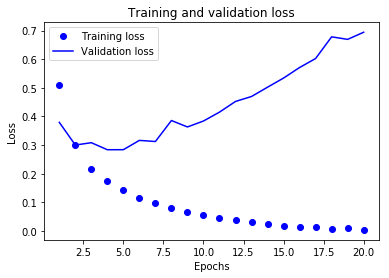

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


epochs = range(1, len(loss_values)+ 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

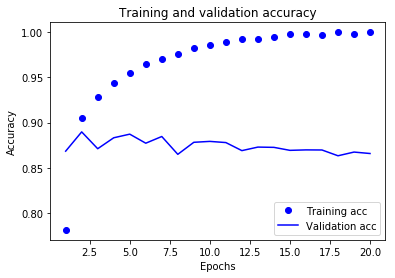

In [28]:
plt.clf()  #清除圖表
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
model = models.Sequential()  #建立模型
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)  #訓練 4 個週期的神經網路
results = model.evaluate(x_test, y_test)  #輸入測試資料與測試標籤進行評估
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 60us/step - loss: 0.1987 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 2s 95us/step
[0.3238623373794556, 0.87308]


In [30]:
model.predict(x_test)

array([[0.13560072],
       [0.99971175],
       [0.27816346],
       ...,
       [0.07139981],
       [0.04283798],
       [0.47383893]], dtype=float32)